# Naive Bayes

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

df = pd.read_csv("../data/spam.csv", encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df_no_nan = df.dropna(axis=1)
df_no_nan.columns = ["class", "content"]
df_no_nan.head()

,class,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='class', ylabel='count'>

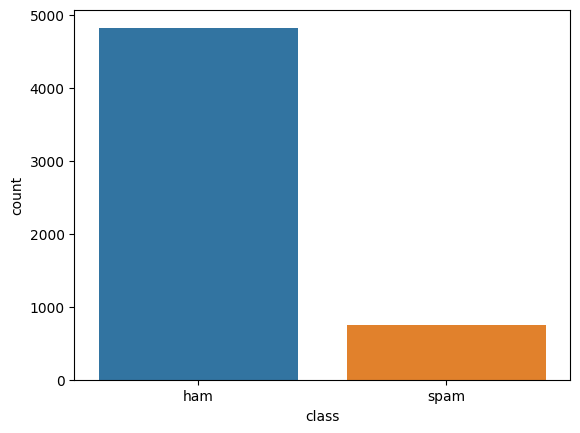

In [8]:
sns.countplot(data = df_no_nan, x = "class")

In [14]:
df = pd.get_dummies(df_no_nan, columns=["class"], drop_first=True)
X, y = df["content"], df["class_spam"]
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: content, dtype: object

In [10]:
X,y = df_no_nan["content"], df_no_nan["class"]
X.head(), y.head()

(0    Go until jurong point, crazy.. Available only ...
 1                        Ok lar... Joking wif u oni...
 2    Free entry in 2 a wkly comp to win FA Cup fina...
 3    U dun say so early hor... U c already then say...
 4    Nah I don't think he goes to usf, he lives aro...
 Name: content, dtype: object,
 0     ham
 1     ham
 2    spam
 3     ham
 4     ham
 Name: class, dtype: object)

In [15]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: class_spam, dtype: uint8

## TF-IDF 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(stop_words="english")
print(tfidf_vectorizer.get_stop_words())

frozenset({'i', 'one', 'beside', 'nothing', 'forty', 'between', 'hers', 'latter', 'move', 'were', 'its', 'hereupon', 'without', 'others', 'wherein', 'below', 'therefore', 'thru', 'whatever', 'upon', 'therein', 'already', 'do', 'too', 'hence', 'mostly', 'some', 'hundred', 'cry', 'whereafter', 'bottom', 'keep', 'anywhere', 'beyond', 'six', 'eg', 'within', 'whenever', 'system', 'same', 'ltd', 'often', 'made', 'whither', 'and', 'there', 'itself', 'on', 'what', 'twenty', 'from', 'through', 'or', 'ten', 'four', 'if', 'together', 'herself', 'me', 'whole', 'find', 'hereby', 'since', 're', 'when', 'fifteen', 'down', 'could', 'be', 'everything', 'again', 'of', 'although', 'then', 'bill', 'former', 'nor', 'under', 'ever', 'a', 'whereupon', 'up', 'front', 'yourself', 'back', 'seems', 'either', 'as', 'fill', 'in', 'less', 'found', 'ie', 'cannot', 'wherever', 'beforehand', 'thick', 'describe', 'except', 'alone', 'con', 'couldnt', 'your', 'whose', 'any', 'sincere', 'would', 'empty', 'enough', 'howeve

In [12]:
X_tfidf = tfidf_vectorizer.fit_transform(X)
X_tfidf

<5572x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 43478 stored elements in Compressed Sparse Row format>

In [13]:
X_tfidf.min(), X_tfidf.max()

(0.0, 1.0)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=.33, random_state=42)
X_train.shape, X_test.shape

((3733, 8404), (1839, 8404))

<Axes: xlabel='class', ylabel='count'>

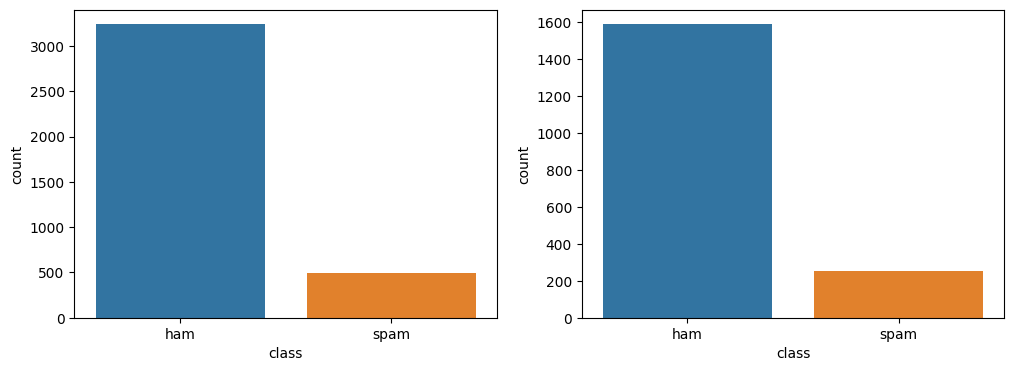

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.countplot(x=y_train, ax = ax[0])
sns.countplot(x=y_test, ax = ax[1])

## Naive bayes

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels = ["Ham", "Spam"]).plot()

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1587
        spam       1.00      0.75      0.86       252

    accuracy                           0.97      1839
   macro avg       0.98      0.88      0.92      1839
weighted avg       0.97      0.97      0.96      1839



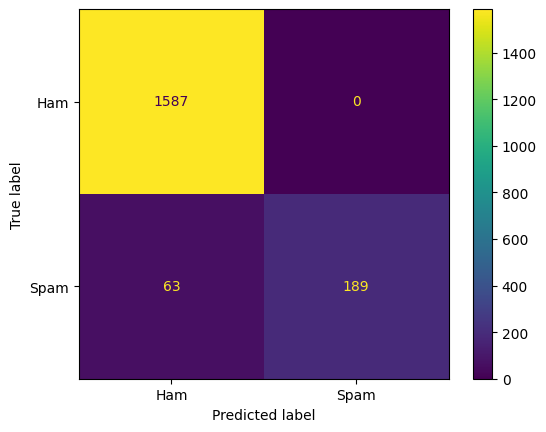

In [18]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB

naive_bayes = dict(
    multinomial=MultinomialNB(), bernouilli=BernoulliNB(), complement=ComplementNB()
)

evaluate_model(naive_bayes["multinomial"])

# recall = TP/(TP+FN)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1587
        spam       0.98      0.81      0.89       252

    accuracy                           0.97      1839
   macro avg       0.97      0.91      0.94      1839
weighted avg       0.97      0.97      0.97      1839



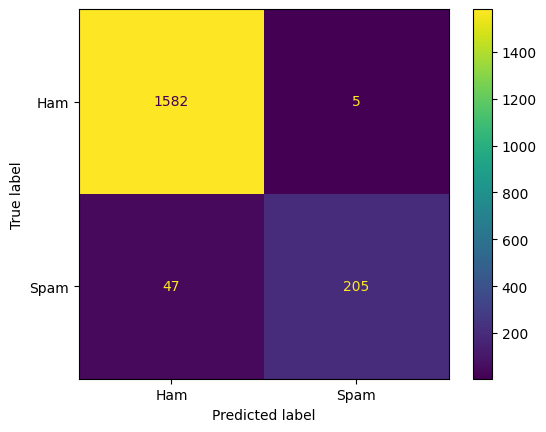

In [19]:
evaluate_model(naive_bayes["bernouilli"])

              precision    recall  f1-score   support

         ham       0.99      0.92      0.96      1587
        spam       0.66      0.94      0.78       252

    accuracy                           0.93      1839
   macro avg       0.83      0.93      0.87      1839
weighted avg       0.95      0.93      0.93      1839



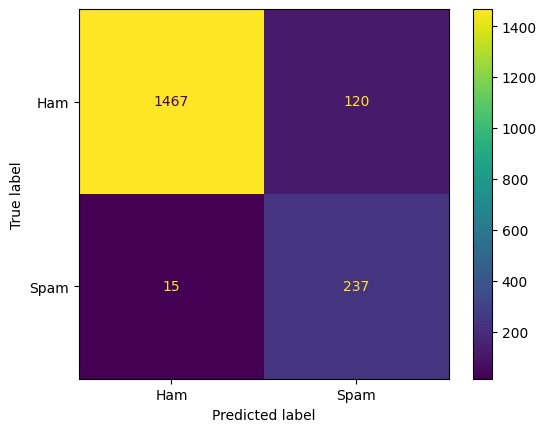

In [20]:
evaluate_model(naive_bayes["complement"])

## Some other models

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1587
        spam       0.97      0.85      0.91       252

    accuracy                           0.98      1839
   macro avg       0.97      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



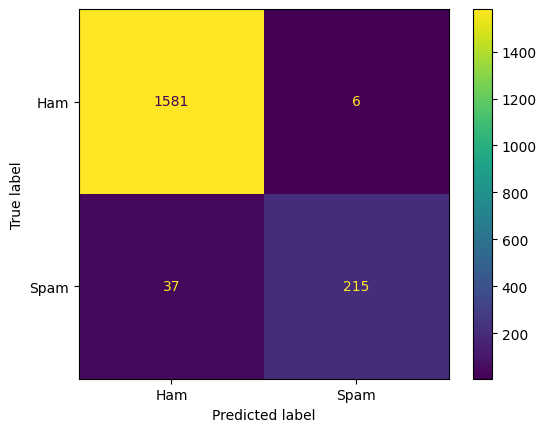

In [21]:
from sklearn.svm import LinearSVC

evaluate_model(LinearSVC())

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1587
        spam       0.99      0.85      0.91       252

    accuracy                           0.98      1839
   macro avg       0.98      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



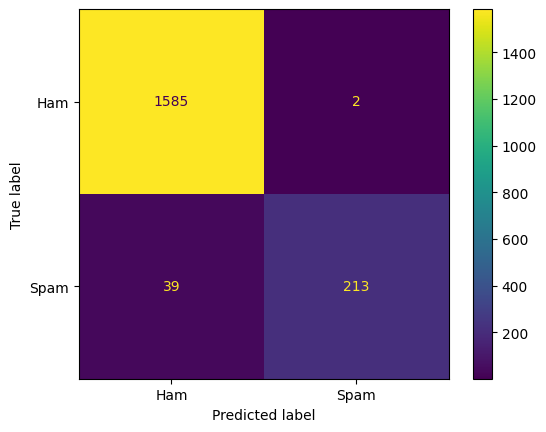

In [22]:
from sklearn.ensemble import RandomForestClassifier

evaluate_model(RandomForestClassifier())

## Combine different models

- majority vote
- class with most votes wins (hard voting)
- class with highest probability wins (soft voting)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1587
        spam       1.00      0.85      0.92       252

    accuracy                           0.98      1839
   macro avg       0.99      0.93      0.95      1839
weighted avg       0.98      0.98      0.98      1839



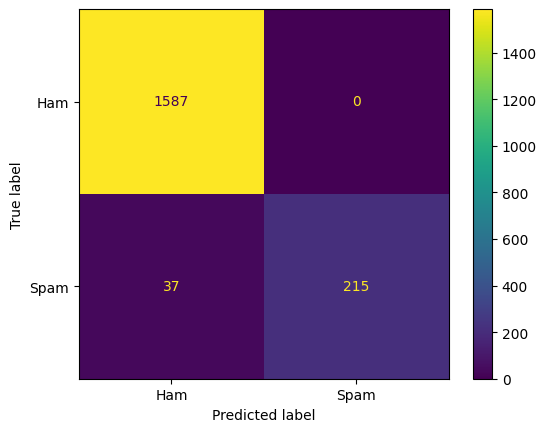

In [23]:
from sklearn.ensemble import VotingClassifier

vote_clf = VotingClassifier([
    ("random_forest", RandomForestClassifier()),
    ("svc", LinearSVC()),
    ("naive_complement", ComplementNB()),
    ("naive_multinomial", MultinomialNB()),
    ("naive_bernouilli", BernoulliNB())
], voting = "hard")

evaluate_model(vote_clf)

## Testing out a model - "deploy"

- assume we choose vote_clf

In [24]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("tfidf", TfidfVectorizer(stop_words="english")), ("vote", vote_clf)])

# fits on all data
pipe.fit(X,y)
pipe.predict(["Come and collect your $1000 Bitcoins!"])

array(['ham'], dtype=object)

In [25]:
pipe.predict(["You will win, $1000 for free"])

array(['spam'], dtype=object)

In [26]:
pipe.predict(["love bitcoin"])

array(['ham'], dtype=object)

In [27]:
pipe.predict(["You get €500"])

array(['spam'], dtype=object)